<a href="https://colab.research.google.com/github/We-Want-it-That-Way/Analysis-of-Plot/blob/main/Graph_1_Analysis_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
H=pd.DataFrame({'Name of pulsar':['J0205+6449','J0218+4232','J0437-4715','J0534+2200','J1105-6107','J1124-5916','J1617-5055','J1930+1852','J2124-3358','J2229+6114'],'po':[0.06571592849324,0.00232309053151224,0.005757451936712637,0.0333924123,0.0632021309179,0.13547685441,0.069356847,0.136855046957,0.00493111494309662,0.05162357393],'pdot':[1.93754256e-13,7.73955e-20,5.729215e-20,4.20972e-13,1.584462e-14,7.52566e-13,1.351e-13,7.5057e-13,2.05705e-20,7.827e-14],'D in Kpc':[3.200,3.150,0.157,2.000,2.360, 5.000, 4.743, 7.000, 0.410, 3.000],'Age':[5.37e+03,4.76e+08,1.59e+09,1.26e+03,6.32e+04,2.85e+03, 8.13e+03, 2.89e+03, 3.8e+09, 1.05e+04],'R_L':['NaN',466.36,13.52,2200.00,'NaN','NaN','NaN','NaN', 2.86, 13.50],'B_s':[3.61e+12,4.29e+08,4.29e+08,3.79e+12,1.01e+12,1.02e+13,3.1e+12,1.03e+13,3.22e+08,2.03e+12],
'Edot':[2.7e+37,2.4e+35,1.2e+34,4.5e+38,2.5e+36,1.2e+37,1.6e+37,1.2e+37,6.8e+33,2.2e+37],
'Edot2':[2.6e+36,2.5e+34,4.8e+35,1.1e+38,4.4e+35,4.8e+35,7.1e+35,2.4e+35,2.4e+35,2.5e+36],
'B_sI':[3.61e+12,4.27e+08,2.85e+08,3.79e+12,np.nan,np.nan,np.nan,np.nan, 1.92e+08,np.nan],
'B_Lc':[1.19e+05,3.21e+05,2.85e+04,9.55e+05,3.76e+04,3.85e+04, 8.70e+04, 3.75e+04, 2.52e+04, 1.39e+05]})
H

,Name of pulsar,po,pdot,D in Kpc,Age,R_L,B_s,Edot,Edot2,B_sI,B_Lc
0,J0205+6449,0.065716,1.937543e-13,3.200,5.370000e+03,NaN,3.610000e+12,2.700000e+37,2.600000e+36,3.610000e+12,119000.0
1,J0218+4232,0.002323,7.739550e-20,3.150,4.760000e+08,466.36,4.290000e+08,2.400000e+35,2.500000e+34,4.270000e+08,321000.0
2,J0437-4715,0.005757,5.729215e-20,0.157,1.590000e+09,13.52,4.290000e+08,1.200000e+34,4.800000e+35,2.850000e+08,28500.0
3,J0534+2200,0.033392,4.209720e-13,2.000,1.260000e+03,2200,3.790000e+12,4.500000e+38,1.100000e+38,3.790000e+12,955000.0
4,J1105-6107,0.063202,1.584462e-14,2.360,6.320000e+04,NaN,1.010000e+12,2.500000e+36,4.400000e+35,NaN,37600.0
5,J1124-5916,0.135477,7.525660e-13,5.000,2.850000e+03,NaN,1.020000e+13,1.200000e+37,4.800000e+35,NaN,38500.0
6,J1617-5055,0.069357,1.351000e-13,4.743,8.130000e+03,NaN,3.100000e+12,1.600000e+37,7.100000e+35,NaN,87000.0
7,J1930+1852,0.136855,7.505700e-13,7.000,2.890000e+03,NaN,1.030000e+13,1.200000e+37,2.400000e+35,NaN,37500.0
8,J2124-3358,0.004931,2.057050e-20,0.410,3.800000e+09,2.86,3.220000e+08,6.800000e+33,2.400000e+35,1.920000e+08,25200.0
9,J2229+6114,0.051624,7.827000e-14,3.000,1.050000e+04,13.5,2.030000e+12,2.200000e+37,2.500000e+36,NaN,139000.0


In [ ]:
H.iloc[:,[0,1]].max()


In [2]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)

Text(0, 0.5, 'logP')

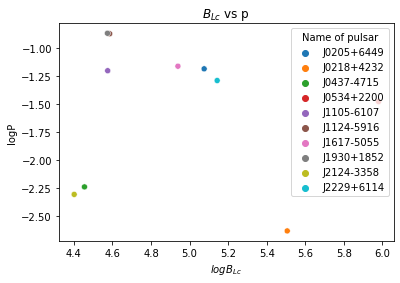

In [3]:
sns.scatterplot(x=np.log10(H['B_Lc']), y=np.log10(H['po']),hue=H['Name of pulsar'])
plt.title("$B_{Lc}$ vs p")
plt.xlabel("$logB_{Lc}$")
plt.ylabel("logP")

Seeing the data

In [4]:
H.iloc[:,[0,1]].sort_values(by='po',ascending=True)

,Name of pulsar,po
1,J0218+4232,0.002323
8,J2124-3358,0.004931
2,J0437-4715,0.005757
3,J0534+2200,0.033392
9,J2229+6114,0.051624
4,J1105-6107,0.063202
0,J0205+6449,0.065716
6,J1617-5055,0.069357
5,J1124-5916,0.135477
7,J1930+1852,0.136855


In [5]:
H.iloc[:,[0,10]].sort_values(by='B_Lc',ascending=False)

,Name of pulsar,B_Lc
3,J0534+2200,955000.0
1,J0218+4232,321000.0
9,J2229+6114,139000.0
0,J0205+6449,119000.0
6,J1617-5055,87000.0
5,J1124-5916,38500.0
4,J1105-6107,37600.0
7,J1930+1852,37500.0
2,J0437-4715,28500.0
8,J2124-3358,25200.0


type 1: The faster the pulsar spins(Lower po values is said to be fast moving pulsar), the higher the B_Lc values 

In [6]:
t_1=H.iloc[[3,9,0,6,5,7],[0,1,10]]
t_1

,Name of pulsar,po,B_Lc
3,J0534+2200,0.033392,955000.0
9,J2229+6114,0.051624,139000.0
0,J0205+6449,0.065716,119000.0
6,J1617-5055,0.069357,87000.0
5,J1124-5916,0.135477,38500.0
7,J1930+1852,0.136855,37500.0


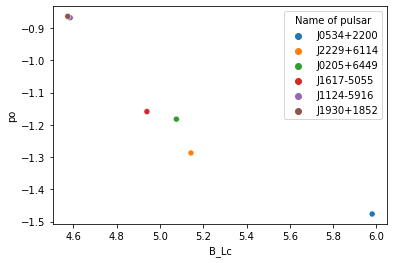

In [7]:
sns.scatterplot(x=np.log10(t_1['B_Lc']), y=np.log10(t_1['po']),hue=t_1['Name of pulsar'])

Type2: same as previous one, but it doesn't match when i put type 1, type 2 together(The fast spinning pulsar has good B_Lc)

In [8]:
t_2=H.iloc[[1,4],[0,1,10]]
t_2

,Name of pulsar,po,B_Lc
1,J0218+4232,0.002323,321000.0
4,J1105-6107,0.063202,37600.0


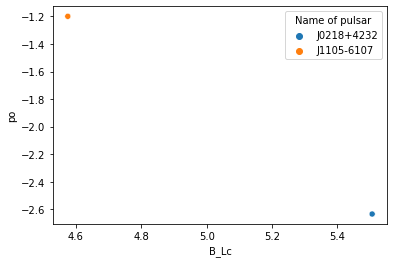

In [9]:
sns.scatterplot(x=np.log10(t_2['B_Lc']), y=np.log10(t_2['po']),hue=t_2['Name of pulsar'])

Together type 1 , type 2

In [10]:
ty_1_2=H.iloc[[3,9,0,6,5,7,1,4],[0,1,10]]

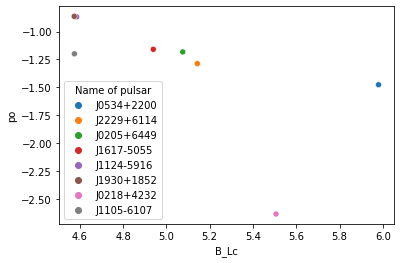

In [11]:
sns.scatterplot(x=np.log10(ty_1_2['B_Lc']), y=np.log10(ty_1_2['po']),hue=ty_1_2['Name of pulsar'])

type3 The faster pulsar spins, the lower the B_Lc(Having inverse relationship compared to previous)

In [12]:
t_3=H.iloc[[8,2],[0,1,10]]
t_3

,Name of pulsar,po,B_Lc
8,J2124-3358,0.004931,25200.0
2,J0437-4715,0.005757,28500.0


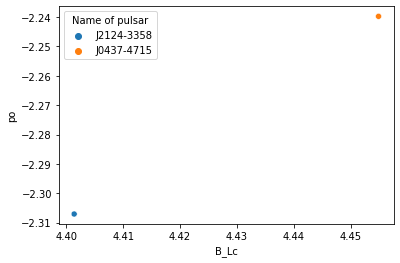

In [13]:
sns.scatterplot(x=np.log10(t_3['B_Lc']), y=np.log10(t_3['po']),hue=t_3['Name of pulsar'])

*We have to check why type 1 is giving good relation, Why Type 2 is not giving proper relation when we combine with the type 1 data, Why Type 3 is giving inverse relation compare to type 1, 2 *
